# Neural Net to Predict Age

# Imports

In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.optimizers import Adam

# Data

In [74]:
data = pd.read_csv("./Volumetric_features.csv")

data_features = pd.DataFrame(data, columns = data.columns[:-1])
data_features = data_features.drop(['S.No','Age'], axis=1)

data_features.head()
data_features.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03
mean,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,1797.243469,...,2.117151,2.655624,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06
std,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,583.220321,...,0.174228,0.207942,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05
min,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,371.900000,...,1.499000,1.563000,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05
25%,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,1408.050000,...,2.002250,2.521000,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06
50%,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,1683.850000,...,2.130000,2.665000,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06
75%,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,2044.525000,...,2.245000,2.808000,2.562750,2.851000,3.790000,2.476000,2.975000,2.483143,1.168888e+06,1.625445e+06
max,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,5312.400000,...,2.671000,3.240000,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06


# Preprocessing

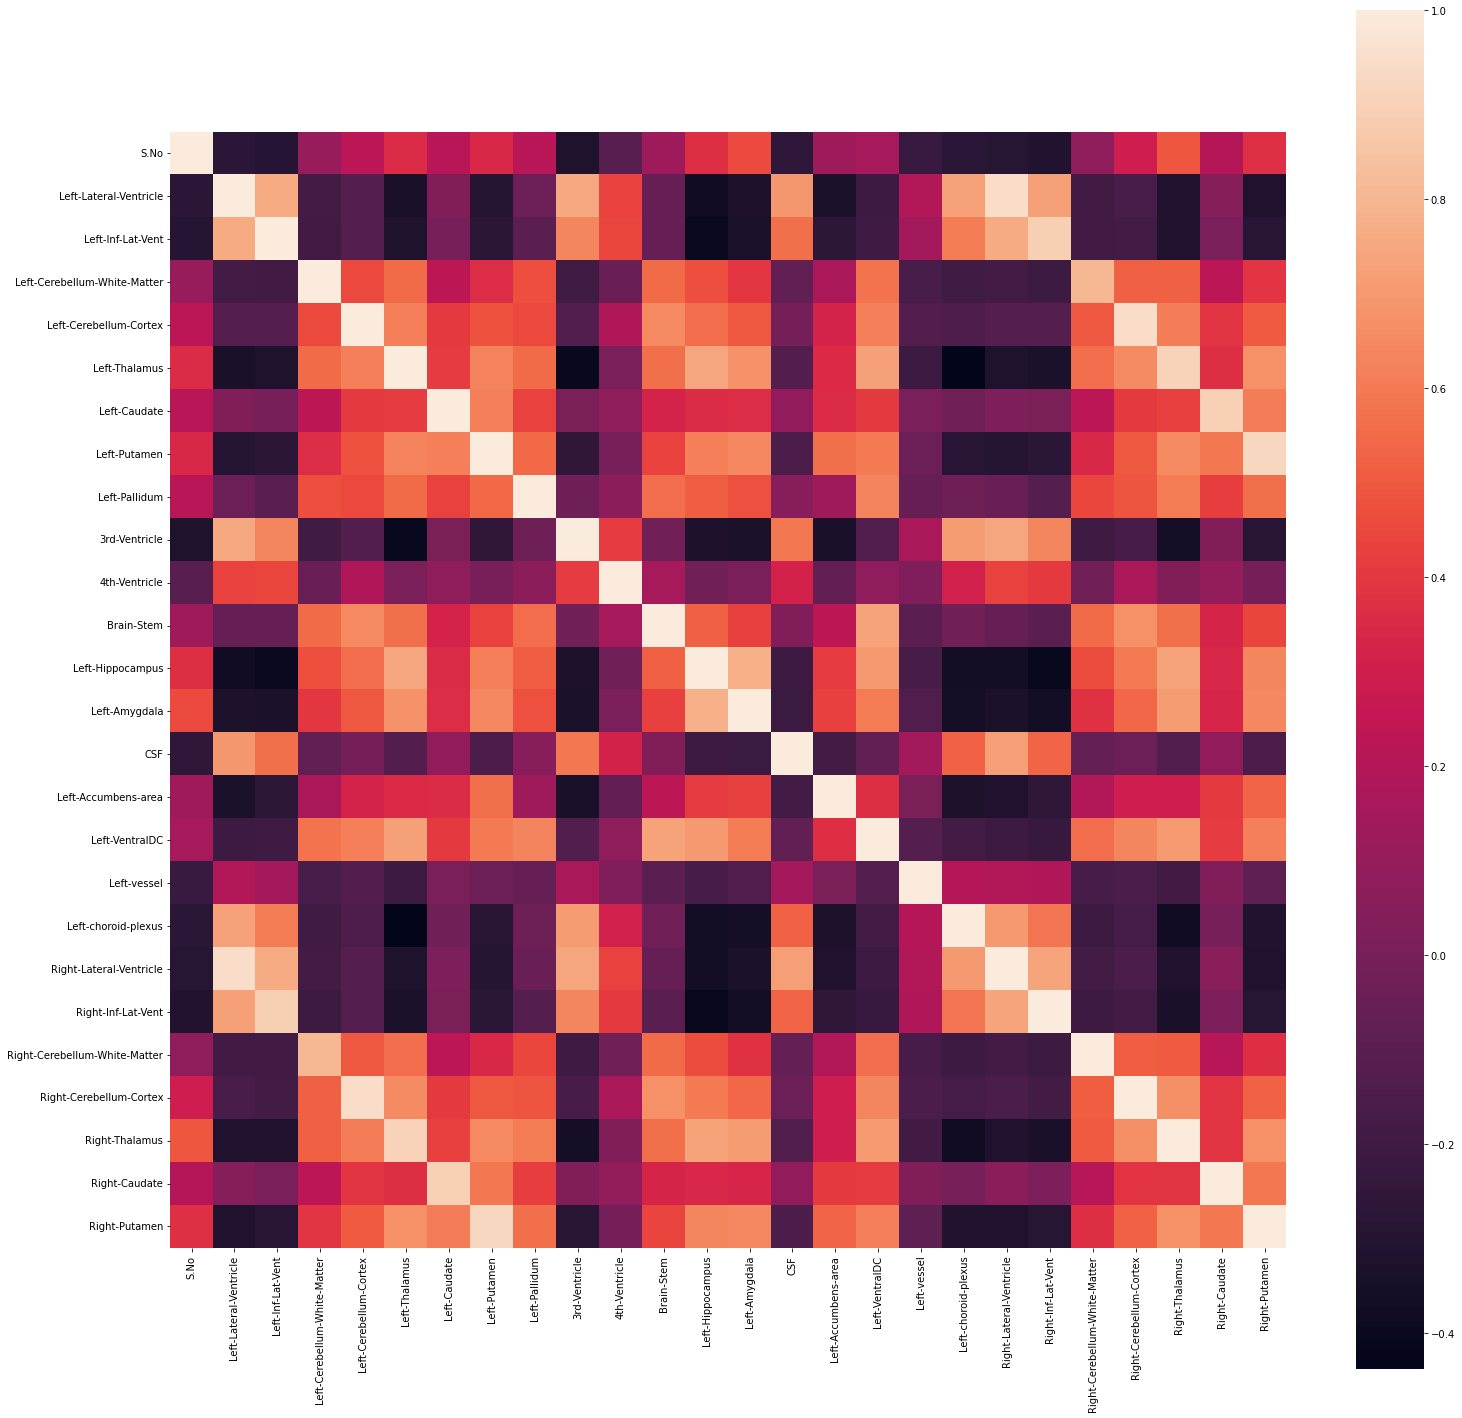

In [75]:
C_mat = data.iloc[:,:-115].corr()
fig = plt.figure(figsize = (25,25))

sb.heatmap(C_mat, square=True)
plt.show()

# Create Model

In [81]:
model = keras.models.Sequential()

model.add(keras.Input(shape=(138,)))
model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 138)               19182     
_________________________________________________________________
dense_100 (Dense)            (None, 278)               38642     
_________________________________________________________________
dense_101 (Dense)            (None, 278)               77562     
_________________________________________________________________
dense_102 (Dense)            (None, 278)               77562     
_________________________________________________________________
dense_103 (Dense)            (None, 278)               77562     
_________________________________________________________________
dense_104 (Dense)            (None, 138)               38502     
_________________________________________________________________
dense_105 (Dense)            (None, 1)               

# Training

In [ ]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(data_features, data['Age'], test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=37)

training = model.fit(X_train, Y_train, batch_size=256, verbose=1, epochs=2000, validation_data=(X_validate, Y_validate))

score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print(score)
print("Validate mean_absolute_error:", score[0])
print("Validate accuracy:", score[1])

Epoch 1/2000
14/14 [==============================] - 0s 34ms/step - loss: 44384.2969 - mean_absolute_error: 44384.2969 - val_loss: 12373.0420 - val_mean_absolute_error: 12373.0420
Epoch 2/2000
14/14 [==============================] - 0s 29ms/step - loss: 12585.0459 - mean_absolute_error: 12585.0459 - val_loss: 7198.9478 - val_mean_absolute_error: 7198.9478
Epoch 3/2000
14/14 [==============================] - 0s 23ms/step - loss: 5981.9785 - mean_absolute_error: 5981.9785 - val_loss: 4766.2271 - val_mean_absolute_error: 4766.2271
Epoch 4/2000
14/14 [==============================] - 0s 19ms/step - loss: 2306.3369 - mean_absolute_error: 2306.3369 - val_loss: 1261.3660 - val_mean_absolute_error: 1261.3660
Epoch 5/2000
14/14 [==============================] - 0s 22ms/step - loss: 973.1373 - mean_absolute_error: 973.1373 - val_loss: 803.9550 - val_mean_absolute_error: 803.9550
Epoch 6/2000
14/14 [==============================] - 0s 20ms/step - loss: 674.9714 - mean_absolute_error: 674.97

14/14 [==============================] - 0s 23ms/step - loss: 34.2339 - mean_absolute_error: 34.2339 - val_loss: 41.7194 - val_mean_absolute_error: 41.7194
Epoch 49/2000
14/14 [==============================] - 0s 18ms/step - loss: 22.5599 - mean_absolute_error: 22.5599 - val_loss: 23.0699 - val_mean_absolute_error: 23.0699
Epoch 50/2000
14/14 [==============================] - 0s 17ms/step - loss: 17.4201 - mean_absolute_error: 17.4201 - val_loss: 18.2223 - val_mean_absolute_error: 18.2223
Epoch 51/2000
14/14 [==============================] - 0s 15ms/step - loss: 16.0994 - mean_absolute_error: 16.0994 - val_loss: 15.3821 - val_mean_absolute_error: 15.3821
Epoch 52/2000
14/14 [==============================] - 0s 17ms/step - loss: 15.3420 - mean_absolute_error: 15.3420 - val_loss: 15.0545 - val_mean_absolute_error: 15.0545
Epoch 53/2000
14/14 [==============================] - 0s 19ms/step - loss: 14.5833 - mean_absolute_error: 14.5833 - val_loss: 15.6108 - val_mean_absolute_error: 15

14/14 [==============================] - 0s 20ms/step - loss: 41.9068 - mean_absolute_error: 41.9068 - val_loss: 62.4858 - val_mean_absolute_error: 62.4858
Epoch 97/2000
14/14 [==============================] - 0s 22ms/step - loss: 97.1258 - mean_absolute_error: 97.1258 - val_loss: 69.8398 - val_mean_absolute_error: 69.8398
Epoch 98/2000
14/14 [==============================] - 0s 19ms/step - loss: 78.7913 - mean_absolute_error: 78.7913 - val_loss: 76.0703 - val_mean_absolute_error: 76.0703
Epoch 99/2000
14/14 [==============================] - 0s 23ms/step - loss: 35.8334 - mean_absolute_error: 35.8334 - val_loss: 42.7989 - val_mean_absolute_error: 42.7989
Epoch 100/2000
14/14 [==============================] - 0s 18ms/step - loss: 24.6210 - mean_absolute_error: 24.6210 - val_loss: 16.3930 - val_mean_absolute_error: 16.3930
Epoch 101/2000
14/14 [==============================] - 0s 22ms/step - loss: 19.0005 - mean_absolute_error: 19.0005 - val_loss: 15.3580 - val_mean_absolute_error: 

14/14 [==============================] - 0s 16ms/step - loss: 12.7183 - mean_absolute_error: 12.7183 - val_loss: 13.9292 - val_mean_absolute_error: 13.9292
Epoch 145/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.6606 - mean_absolute_error: 11.6606 - val_loss: 12.2456 - val_mean_absolute_error: 12.2456
Epoch 146/2000
14/14 [==============================] - 0s 19ms/step - loss: 11.4464 - mean_absolute_error: 11.4464 - val_loss: 13.6498 - val_mean_absolute_error: 13.6498
Epoch 147/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.7956 - mean_absolute_error: 11.7956 - val_loss: 13.4302 - val_mean_absolute_error: 13.4302
Epoch 148/2000
14/14 [==============================] - 0s 21ms/step - loss: 11.9564 - mean_absolute_error: 11.9564 - val_loss: 14.1269 - val_mean_absolute_error: 14.1269
Epoch 149/2000
14/14 [==============================] - 0s 18ms/step - loss: 11.7883 - mean_absolute_error: 11.7883 - val_loss: 13.1403 - val_mean_absolute_erro

Epoch 192/2000
14/14 [==============================] - 0s 24ms/step - loss: 11.9704 - mean_absolute_error: 11.9704 - val_loss: 12.7128 - val_mean_absolute_error: 12.7128
Epoch 193/2000
14/14 [==============================] - 0s 19ms/step - loss: 11.8648 - mean_absolute_error: 11.8648 - val_loss: 12.3992 - val_mean_absolute_error: 12.3992
Epoch 194/2000
14/14 [==============================] - 0s 20ms/step - loss: 11.6200 - mean_absolute_error: 11.6200 - val_loss: 16.0592 - val_mean_absolute_error: 16.0592
Epoch 195/2000
14/14 [==============================] - 0s 19ms/step - loss: 12.4128 - mean_absolute_error: 12.4128 - val_loss: 12.6276 - val_mean_absolute_error: 12.6276
Epoch 196/2000
14/14 [==============================] - 0s 15ms/step - loss: 11.4257 - mean_absolute_error: 11.4257 - val_loss: 14.2638 - val_mean_absolute_error: 14.2638
Epoch 197/2000
14/14 [==============================] - 0s 17ms/step - loss: 13.2554 - mean_absolute_error: 13.2554 - val_loss: 18.2604 - val_mea

Epoch 240/2000
14/14 [==============================] - 0s 18ms/step - loss: 11.0812 - mean_absolute_error: 11.0812 - val_loss: 12.1792 - val_mean_absolute_error: 12.1792
Epoch 241/2000
14/14 [==============================] - 0s 17ms/step - loss: 10.6555 - mean_absolute_error: 10.6555 - val_loss: 12.7318 - val_mean_absolute_error: 12.7318
Epoch 242/2000
14/14 [==============================] - 0s 14ms/step - loss: 11.0412 - mean_absolute_error: 11.0412 - val_loss: 12.9844 - val_mean_absolute_error: 12.9844
Epoch 243/2000
14/14 [==============================] - 0s 16ms/step - loss: 11.8990 - mean_absolute_error: 11.8990 - val_loss: 12.3993 - val_mean_absolute_error: 12.3993
Epoch 244/2000
14/14 [==============================] - 0s 20ms/step - loss: 11.0674 - mean_absolute_error: 11.0674 - val_loss: 14.1566 - val_mean_absolute_error: 14.1566
Epoch 245/2000
14/14 [==============================] - 0s 20ms/step - loss: 11.6410 - mean_absolute_error: 11.6410 - val_loss: 11.7346 - val_mea

Epoch 288/2000
14/14 [==============================] - 0s 18ms/step - loss: 11.4100 - mean_absolute_error: 11.4100 - val_loss: 12.5529 - val_mean_absolute_error: 12.5529
Epoch 289/2000
14/14 [==============================] - 0s 18ms/step - loss: 11.0033 - mean_absolute_error: 11.0033 - val_loss: 13.0830 - val_mean_absolute_error: 13.0830
Epoch 290/2000
14/14 [==============================] - 0s 19ms/step - loss: 11.0786 - mean_absolute_error: 11.0786 - val_loss: 12.0980 - val_mean_absolute_error: 12.0980
Epoch 291/2000
14/14 [==============================] - 0s 16ms/step - loss: 11.5478 - mean_absolute_error: 11.5478 - val_loss: 15.1829 - val_mean_absolute_error: 15.1829
Epoch 292/2000
14/14 [==============================] - 0s 20ms/step - loss: 11.8903 - mean_absolute_error: 11.8903 - val_loss: 13.5029 - val_mean_absolute_error: 13.5029
Epoch 293/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.7089 - mean_absolute_error: 11.7089 - val_loss: 11.8529 - val_mea

Epoch 336/2000
14/14 [==============================] - 0s 16ms/step - loss: 10.8610 - mean_absolute_error: 10.8610 - val_loss: 12.0560 - val_mean_absolute_error: 12.0560
Epoch 337/2000
14/14 [==============================] - 0s 19ms/step - loss: 10.4602 - mean_absolute_error: 10.4602 - val_loss: 13.5353 - val_mean_absolute_error: 13.5353
Epoch 338/2000
14/14 [==============================] - 0s 16ms/step - loss: 11.4012 - mean_absolute_error: 11.4012 - val_loss: 12.5424 - val_mean_absolute_error: 12.5424
Epoch 339/2000
14/14 [==============================] - 0s 17ms/step - loss: 12.1039 - mean_absolute_error: 12.1039 - val_loss: 15.1805 - val_mean_absolute_error: 15.1805
Epoch 340/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.7635 - mean_absolute_error: 11.7635 - val_loss: 12.6987 - val_mean_absolute_error: 12.6987
Epoch 341/2000
14/14 [==============================] - 0s 20ms/step - loss: 10.9457 - mean_absolute_error: 10.9457 - val_loss: 12.4842 - val_mea

Epoch 384/2000
14/14 [==============================] - 0s 20ms/step - loss: 11.8850 - mean_absolute_error: 11.8850 - val_loss: 12.6616 - val_mean_absolute_error: 12.6616
Epoch 385/2000
14/14 [==============================] - 0s 21ms/step - loss: 11.8370 - mean_absolute_error: 11.8370 - val_loss: 13.5249 - val_mean_absolute_error: 13.5249
Epoch 386/2000
14/14 [==============================] - 0s 21ms/step - loss: 12.4026 - mean_absolute_error: 12.4026 - val_loss: 13.9211 - val_mean_absolute_error: 13.9211
Epoch 387/2000
14/14 [==============================] - 0s 20ms/step - loss: 12.0042 - mean_absolute_error: 12.0042 - val_loss: 14.6915 - val_mean_absolute_error: 14.6915
Epoch 388/2000
14/14 [==============================] - 0s 21ms/step - loss: 13.6046 - mean_absolute_error: 13.6046 - val_loss: 14.0845 - val_mean_absolute_error: 14.0845
Epoch 389/2000
14/14 [==============================] - 0s 22ms/step - loss: 12.3750 - mean_absolute_error: 12.3750 - val_loss: 12.7174 - val_mea

Epoch 432/2000
14/14 [==============================] - 0s 18ms/step - loss: 10.9780 - mean_absolute_error: 10.9780 - val_loss: 12.7497 - val_mean_absolute_error: 12.7497
Epoch 433/2000
14/14 [==============================] - 0s 19ms/step - loss: 11.7256 - mean_absolute_error: 11.7256 - val_loss: 12.1817 - val_mean_absolute_error: 12.1817
Epoch 434/2000
14/14 [==============================] - 0s 16ms/step - loss: 10.9776 - mean_absolute_error: 10.9776 - val_loss: 12.0613 - val_mean_absolute_error: 12.0613
Epoch 435/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.3685 - mean_absolute_error: 11.3685 - val_loss: 12.8634 - val_mean_absolute_error: 12.8634
Epoch 436/2000
14/14 [==============================] - 0s 16ms/step - loss: 11.1536 - mean_absolute_error: 11.1536 - val_loss: 12.0429 - val_mean_absolute_error: 12.0429
Epoch 437/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.0433 - mean_absolute_error: 11.0433 - val_loss: 12.9334 - val_mea

Epoch 480/2000
14/14 [==============================] - 0s 19ms/step - loss: 10.5130 - mean_absolute_error: 10.5130 - val_loss: 11.6261 - val_mean_absolute_error: 11.6261
Epoch 481/2000
14/14 [==============================] - 0s 17ms/step - loss: 10.5607 - mean_absolute_error: 10.5607 - val_loss: 11.5892 - val_mean_absolute_error: 11.5892
Epoch 482/2000
14/14 [==============================] - 0s 21ms/step - loss: 10.5001 - mean_absolute_error: 10.5001 - val_loss: 11.5466 - val_mean_absolute_error: 11.5466
Epoch 483/2000
14/14 [==============================] - 0s 15ms/step - loss: 10.4153 - mean_absolute_error: 10.4153 - val_loss: 12.4342 - val_mean_absolute_error: 12.4342
Epoch 484/2000
14/14 [==============================] - 0s 15ms/step - loss: 11.1176 - mean_absolute_error: 11.1176 - val_loss: 11.6887 - val_mean_absolute_error: 11.6887
Epoch 485/2000
14/14 [==============================] - 0s 18ms/step - loss: 10.7980 - mean_absolute_error: 10.7980 - val_loss: 14.4742 - val_mea

Epoch 528/2000
14/14 [==============================] - 0s 16ms/step - loss: 10.3910 - mean_absolute_error: 10.3910 - val_loss: 11.2186 - val_mean_absolute_error: 11.2186
Epoch 529/2000
14/14 [==============================] - 0s 21ms/step - loss: 10.4613 - mean_absolute_error: 10.4613 - val_loss: 11.2500 - val_mean_absolute_error: 11.2500
Epoch 530/2000
14/14 [==============================] - 0s 17ms/step - loss: 10.3317 - mean_absolute_error: 10.3317 - val_loss: 11.5791 - val_mean_absolute_error: 11.5791
Epoch 531/2000
14/14 [==============================] - 0s 19ms/step - loss: 10.2968 - mean_absolute_error: 10.2968 - val_loss: 11.6409 - val_mean_absolute_error: 11.6409
Epoch 532/2000
14/14 [==============================] - 0s 19ms/step - loss: 11.2255 - mean_absolute_error: 11.2255 - val_loss: 11.5919 - val_mean_absolute_error: 11.5919
Epoch 533/2000
14/14 [==============================] - 0s 21ms/step - loss: 11.6080 - mean_absolute_error: 11.6080 - val_loss: 11.7143 - val_mea

Epoch 576/2000
14/14 [==============================] - 0s 19ms/step - loss: 10.3991 - mean_absolute_error: 10.3991 - val_loss: 11.5530 - val_mean_absolute_error: 11.5530
Epoch 577/2000
14/14 [==============================] - 0s 22ms/step - loss: 10.1870 - mean_absolute_error: 10.1870 - val_loss: 10.9115 - val_mean_absolute_error: 10.9115
Epoch 578/2000
14/14 [==============================] - 0s 16ms/step - loss: 10.6608 - mean_absolute_error: 10.6608 - val_loss: 11.0940 - val_mean_absolute_error: 11.0940
Epoch 579/2000
14/14 [==============================] - 0s 26ms/step - loss: 10.0333 - mean_absolute_error: 10.0333 - val_loss: 10.9054 - val_mean_absolute_error: 10.9054
Epoch 580/2000
14/14 [==============================] - 0s 20ms/step - loss: 10.0289 - mean_absolute_error: 10.0289 - val_loss: 10.9795 - val_mean_absolute_error: 10.9795
Epoch 581/2000
14/14 [==============================] - 0s 16ms/step - loss: 10.1623 - mean_absolute_error: 10.1623 - val_loss: 10.9425 - val_mea

14/14 [==============================] - 0s 22ms/step - loss: 9.7793 - mean_absolute_error: 9.7793 - val_loss: 11.0476 - val_mean_absolute_error: 11.0476
Epoch 625/2000
14/14 [==============================] - 0s 21ms/step - loss: 9.6787 - mean_absolute_error: 9.6787 - val_loss: 10.6617 - val_mean_absolute_error: 10.6617
Epoch 626/2000
14/14 [==============================] - 0s 23ms/step - loss: 9.7882 - mean_absolute_error: 9.7882 - val_loss: 10.7783 - val_mean_absolute_error: 10.7783
Epoch 627/2000
14/14 [==============================] - 0s 21ms/step - loss: 9.3869 - mean_absolute_error: 9.3869 - val_loss: 10.5988 - val_mean_absolute_error: 10.5988
Epoch 628/2000
14/14 [==============================] - 0s 18ms/step - loss: 9.3869 - mean_absolute_error: 9.3869 - val_loss: 10.8835 - val_mean_absolute_error: 10.8835
Epoch 629/2000
14/14 [==============================] - 0s 17ms/step - loss: 9.5831 - mean_absolute_error: 9.5831 - val_loss: 13.9426 - val_mean_absolute_error: 13.9426
E

14/14 [==============================] - 0s 14ms/step - loss: 9.1178 - mean_absolute_error: 9.1178 - val_loss: 10.2528 - val_mean_absolute_error: 10.2528
Epoch 673/2000
14/14 [==============================] - 0s 20ms/step - loss: 10.2914 - mean_absolute_error: 10.2914 - val_loss: 10.8654 - val_mean_absolute_error: 10.8654
Epoch 674/2000
14/14 [==============================] - 0s 18ms/step - loss: 10.5950 - mean_absolute_error: 10.5950 - val_loss: 10.6493 - val_mean_absolute_error: 10.6493
Epoch 675/2000
14/14 [==============================] - 0s 18ms/step - loss: 10.1294 - mean_absolute_error: 10.1294 - val_loss: 13.3358 - val_mean_absolute_error: 13.3358
Epoch 676/2000
14/14 [==============================] - 0s 18ms/step - loss: 10.6703 - mean_absolute_error: 10.6703 - val_loss: 11.2533 - val_mean_absolute_error: 11.2533
Epoch 677/2000
14/14 [==============================] - 0s 15ms/step - loss: 9.5038 - mean_absolute_error: 9.5038 - val_loss: 10.3719 - val_mean_absolute_error: 1

14/14 [==============================] - 0s 15ms/step - loss: 10.7195 - mean_absolute_error: 10.7195 - val_loss: 10.5660 - val_mean_absolute_error: 10.5660
Epoch 721/2000
14/14 [==============================] - 0s 15ms/step - loss: 9.3703 - mean_absolute_error: 9.3703 - val_loss: 10.3753 - val_mean_absolute_error: 10.3753
Epoch 722/2000
14/14 [==============================] - 0s 18ms/step - loss: 9.2065 - mean_absolute_error: 9.2065 - val_loss: 10.0757 - val_mean_absolute_error: 10.0757
Epoch 723/2000
14/14 [==============================] - 0s 17ms/step - loss: 9.7495 - mean_absolute_error: 9.7495 - val_loss: 10.2535 - val_mean_absolute_error: 10.2535
Epoch 724/2000
14/14 [==============================] - 0s 17ms/step - loss: 9.1504 - mean_absolute_error: 9.1504 - val_loss: 10.7955 - val_mean_absolute_error: 10.7955
Epoch 725/2000
14/14 [==============================] - 0s 19ms/step - loss: 9.2756 - mean_absolute_error: 9.2756 - val_loss: 10.2761 - val_mean_absolute_error: 10.2761

14/14 [==============================] - 0s 17ms/step - loss: 8.8156 - mean_absolute_error: 8.8156 - val_loss: 11.5963 - val_mean_absolute_error: 11.5963
Epoch 769/2000
14/14 [==============================] - 0s 14ms/step - loss: 9.1881 - mean_absolute_error: 9.1881 - val_loss: 11.1993 - val_mean_absolute_error: 11.1993
Epoch 770/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.7945 - mean_absolute_error: 8.7945 - val_loss: 10.1250 - val_mean_absolute_error: 10.1250
Epoch 771/2000
14/14 [==============================] - 0s 22ms/step - loss: 9.4031 - mean_absolute_error: 9.4031 - val_loss: 11.2575 - val_mean_absolute_error: 11.2575
Epoch 772/2000
14/14 [==============================] - 0s 20ms/step - loss: 9.2988 - mean_absolute_error: 9.2988 - val_loss: 9.8307 - val_mean_absolute_error: 9.8307
Epoch 773/2000
14/14 [==============================] - 0s 15ms/step - loss: 9.4164 - mean_absolute_error: 9.4164 - val_loss: 12.8241 - val_mean_absolute_error: 12.8241
Epo

14/14 [==============================] - 0s 16ms/step - loss: 8.4819 - mean_absolute_error: 8.4819 - val_loss: 11.2804 - val_mean_absolute_error: 11.2804
Epoch 817/2000
14/14 [==============================] - 0s 19ms/step - loss: 9.0393 - mean_absolute_error: 9.0393 - val_loss: 9.9412 - val_mean_absolute_error: 9.9412
Epoch 818/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.7809 - mean_absolute_error: 8.7809 - val_loss: 11.3157 - val_mean_absolute_error: 11.3157
Epoch 819/2000
14/14 [==============================] - 0s 20ms/step - loss: 9.2472 - mean_absolute_error: 9.2472 - val_loss: 10.0661 - val_mean_absolute_error: 10.0661
Epoch 820/2000
14/14 [==============================] - 0s 16ms/step - loss: 8.6577 - mean_absolute_error: 8.6577 - val_loss: 10.0816 - val_mean_absolute_error: 10.0816
Epoch 821/2000
14/14 [==============================] - 0s 14ms/step - loss: 8.7648 - mean_absolute_error: 8.7648 - val_loss: 10.0077 - val_mean_absolute_error: 10.0077
Epo

14/14 [==============================] - 0s 21ms/step - loss: 9.1835 - mean_absolute_error: 9.1835 - val_loss: 10.3186 - val_mean_absolute_error: 10.3186
Epoch 865/2000
14/14 [==============================] - 1s 36ms/step - loss: 8.8311 - mean_absolute_error: 8.8311 - val_loss: 10.3953 - val_mean_absolute_error: 10.3953
Epoch 866/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.8726 - mean_absolute_error: 8.8726 - val_loss: 10.8417 - val_mean_absolute_error: 10.8417
Epoch 867/2000
14/14 [==============================] - 0s 17ms/step - loss: 8.1879 - mean_absolute_error: 8.1879 - val_loss: 10.0323 - val_mean_absolute_error: 10.0323
Epoch 868/2000
14/14 [==============================] - 0s 15ms/step - loss: 8.2606 - mean_absolute_error: 8.2606 - val_loss: 9.6947 - val_mean_absolute_error: 9.6947
Epoch 869/2000
14/14 [==============================] - 0s 19ms/step - loss: 8.3275 - mean_absolute_error: 8.3275 - val_loss: 10.0112 - val_mean_absolute_error: 10.0112
Epo

Epoch 913/2000
14/14 [==============================] - 0s 27ms/step - loss: 8.5488 - mean_absolute_error: 8.5488 - val_loss: 9.4928 - val_mean_absolute_error: 9.4928
Epoch 914/2000
14/14 [==============================] - 0s 19ms/step - loss: 8.2549 - mean_absolute_error: 8.2549 - val_loss: 11.2879 - val_mean_absolute_error: 11.2879
Epoch 915/2000
14/14 [==============================] - 0s 14ms/step - loss: 8.7648 - mean_absolute_error: 8.7648 - val_loss: 9.7756 - val_mean_absolute_error: 9.7756
Epoch 916/2000
14/14 [==============================] - 0s 15ms/step - loss: 8.3184 - mean_absolute_error: 8.3184 - val_loss: 9.7411 - val_mean_absolute_error: 9.7411
Epoch 917/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.8765 - mean_absolute_error: 8.8765 - val_loss: 11.5062 - val_mean_absolute_error: 11.5062
Epoch 918/2000
14/14 [==============================] - 0s 17ms/step - loss: 9.4487 - mean_absolute_error: 9.4487 - val_loss: 9.6146 - val_mean_absolute_error: 9

Epoch 962/2000
14/14 [==============================] - 0s 16ms/step - loss: 8.1829 - mean_absolute_error: 8.1829 - val_loss: 9.4950 - val_mean_absolute_error: 9.4950
Epoch 963/2000
14/14 [==============================] - 0s 16ms/step - loss: 7.7387 - mean_absolute_error: 7.7387 - val_loss: 9.2361 - val_mean_absolute_error: 9.2361
Epoch 964/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.2859 - mean_absolute_error: 8.2859 - val_loss: 9.5257 - val_mean_absolute_error: 9.5257
Epoch 965/2000
14/14 [==============================] - 0s 18ms/step - loss: 7.9335 - mean_absolute_error: 7.9335 - val_loss: 10.3165 - val_mean_absolute_error: 10.3165
Epoch 966/2000
14/14 [==============================] - 0s 15ms/step - loss: 8.5097 - mean_absolute_error: 8.5097 - val_loss: 11.1010 - val_mean_absolute_error: 11.1010
Epoch 967/2000
14/14 [==============================] - 0s 20ms/step - loss: 9.1381 - mean_absolute_error: 9.1381 - val_loss: 10.2490 - val_mean_absolute_error: 

Epoch 1011/2000
14/14 [==============================] - 0s 15ms/step - loss: 8.5092 - mean_absolute_error: 8.5092 - val_loss: 10.6333 - val_mean_absolute_error: 10.6333
Epoch 1012/2000
14/14 [==============================] - 0s 17ms/step - loss: 8.2886 - mean_absolute_error: 8.2886 - val_loss: 9.3197 - val_mean_absolute_error: 9.3197
Epoch 1013/2000
14/14 [==============================] - 0s 18ms/step - loss: 7.8197 - mean_absolute_error: 7.8197 - val_loss: 9.6857 - val_mean_absolute_error: 9.6857
Epoch 1014/2000
14/14 [==============================] - 0s 14ms/step - loss: 8.8224 - mean_absolute_error: 8.8224 - val_loss: 9.7976 - val_mean_absolute_error: 9.7976
Epoch 1015/2000
14/14 [==============================] - 0s 18ms/step - loss: 8.8578 - mean_absolute_error: 8.8578 - val_loss: 9.3174 - val_mean_absolute_error: 9.3174
Epoch 1016/2000
14/14 [==============================] - 0s 16ms/step - loss: 7.7241 - mean_absolute_error: 7.7241 - val_loss: 10.7578 - val_mean_absolute_err

14/14 [==============================] - 0s 20ms/step - loss: 8.2099 - mean_absolute_error: 8.2099 - val_loss: 9.8387 - val_mean_absolute_error: 9.8387
Epoch 1060/2000
14/14 [==============================] - 0s 18ms/step - loss: 7.6436 - mean_absolute_error: 7.6436 - val_loss: 9.0761 - val_mean_absolute_error: 9.0761
Epoch 1061/2000
14/14 [==============================] - 0s 19ms/step - loss: 7.5006 - mean_absolute_error: 7.5006 - val_loss: 11.9508 - val_mean_absolute_error: 11.9508
Epoch 1062/2000
14/14 [==============================] - 0s 19ms/step - loss: 8.3999 - mean_absolute_error: 8.3999 - val_loss: 9.6467 - val_mean_absolute_error: 9.6467
Epoch 1063/2000
14/14 [==============================] - 0s 20ms/step - loss: 8.3356 - mean_absolute_error: 8.3356 - val_loss: 10.6140 - val_mean_absolute_error: 10.6140
Epoch 1064/2000
14/14 [==============================] - 0s 18ms/step - loss: 9.0789 - mean_absolute_error: 9.0789 - val_loss: 10.7316 - val_mean_absolute_error: 10.7316
Ep

14/14 [==============================] - 0s 34ms/step - loss: 7.7536 - mean_absolute_error: 7.7536 - val_loss: 9.2850 - val_mean_absolute_error: 9.2850
Epoch 1108/2000
14/14 [==============================] - 0s 22ms/step - loss: 7.4475 - mean_absolute_error: 7.4475 - val_loss: 8.8952 - val_mean_absolute_error: 8.8952
Epoch 1109/2000
14/14 [==============================] - 0s 19ms/step - loss: 7.7452 - mean_absolute_error: 7.7452 - val_loss: 9.1406 - val_mean_absolute_error: 9.1406
Epoch 1110/2000
14/14 [==============================] - 0s 21ms/step - loss: 7.9491 - mean_absolute_error: 7.9491 - val_loss: 9.5421 - val_mean_absolute_error: 9.5421
Epoch 1111/2000
14/14 [==============================] - 0s 21ms/step - loss: 7.6567 - mean_absolute_error: 7.6567 - val_loss: 9.7656 - val_mean_absolute_error: 9.7656
Epoch 1112/2000
14/14 [==============================] - 0s 22ms/step - loss: 7.9215 - mean_absolute_error: 7.9215 - val_loss: 9.4752 - val_mean_absolute_error: 9.4752
Epoch 11

Epoch 1156/2000
14/14 [==============================] - 0s 16ms/step - loss: 7.7837 - mean_absolute_error: 7.7837 - val_loss: 10.0414 - val_mean_absolute_error: 10.0414
Epoch 1157/2000
14/14 [==============================] - 0s 25ms/step - loss: 7.8097 - mean_absolute_error: 7.8097 - val_loss: 9.8470 - val_mean_absolute_error: 9.8470
Epoch 1158/2000
14/14 [==============================] - 0s 30ms/step - loss: 7.3583 - mean_absolute_error: 7.3583 - val_loss: 8.7210 - val_mean_absolute_error: 8.7210
Epoch 1159/2000
14/14 [==============================] - 0s 23ms/step - loss: 7.3462 - mean_absolute_error: 7.3462 - val_loss: 9.9391 - val_mean_absolute_error: 9.9391
Epoch 1160/2000
14/14 [==============================] - 0s 16ms/step - loss: 8.0460 - mean_absolute_error: 8.0460 - val_loss: 8.7367 - val_mean_absolute_error: 8.7367
Epoch 1161/2000
14/14 [==============================] - 0s 18ms/step - loss: 7.5452 - mean_absolute_error: 7.5452 - val_loss: 9.9132 - val_mean_absolute_erro

ValueError: x and y must have same first dimension, but have shapes (1899,) and (999,)

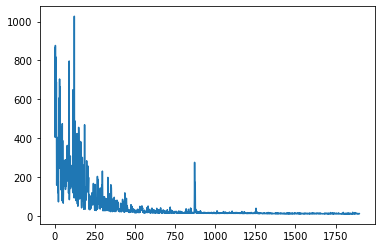

In [80]:
Y_pred_validate = model.predict(X_validate)

x = list(range(1899))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy[100:-1], label='val_loss')
plt.plot( x, ty[1000:-1], label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

# Testing

In [33]:
score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print("Explained variance: " + str(metrics.explained_variance_score(Y_test, Y_pred)))
print("Max Error: " + str(metrics.max_error(Y_test, Y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(Y_test, Y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(Y_test, Y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(Y_test, Y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(Y_test, Y_pred)))

[6.746928691864014, 6.746928691864014]
